<a href="https://colab.research.google.com/github/BrotherKim/Colab/blob/main/SEP592/BK_inceptionv3_BRCA_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dataset download
datasets<br>
    &emsp;&emsp;└── test_set<br>
    &emsp;&emsp;│   &emsp;&emsp;├── cats<br>
    &emsp;&emsp;│   &emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
    &emsp;&emsp;│   &emsp;&emsp;└── dogs<br>
    &emsp;&emsp;│       &emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>
    &emsp;&emsp;└── training_set<br>
        &emsp;&emsp;&emsp;&emsp;├── cats<br>
        &emsp;&emsp;&emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
        &emsp;&emsp;&emsp;&emsp;└── dogs<br>
            &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>


In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp /content/gdrive/MyDrive/KAIST/kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tongpython/cat-and-dog
!mkdir datasets
!unzip /content/cat-and-dog.zip -d /content/datasets
!mv /content/datasets/test_set /content/datasets/test_set_legacy
!mv /content/datasets/test_set_legacy/test_set /content/datasets/test_set
!mv /content/datasets/training_set /content/datasets/training_set_legacy
!mv /content/datasets/training_set_legacy/training_set /content/datasets/training_set
!rm -rf /content/datasets/*_set_legacy

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/datasets/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3714.jpg  
  inflating: /content/datasets/training_s

# Data Load

In [5]:
!ls -l /content/gdrive/MyDrive/KAIST/dataset/test_set

total 8
drwx------ 2 root root 4096 May 30 05:32 lym
drwx------ 2 root root 4096 May 30 05:32 normal


In [6]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 위노그라드 알고리즘 설정
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

#rootPath = '/content/datasets'
rootPath = '/content/gdrive/MyDrive/KAIST/dataset'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train_set'),
    target_size=(224, 224),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train_set'),
    target_size=(224, 224),
    subset='validation'
)

Found 21181 images belonging to 2 classes.
Found 2352 images belonging to 2 classes.


# 모델 구성 및 finetuning

In [7]:
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 2

In [8]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

baseModel = InceptionV3(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, classes=NUM_CLASSES)
#baseModel = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, classes=NUM_CLASSES)
#baseMode =ResNet50(include_top=True, weights=None, input_shape=INPUT_SHAPE, classes=NUM_CLASSES)

baseModel.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________

In [9]:
for i, l in enumerate(baseModel.layers):
  print(i, l.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [10]:
from keras.models import Model
from tensorflow.keras.layers import Flatten, Dropout, Conv2D, MaxPooling2D, Dense, BatchNormalization

x = baseModel.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', input_dim=INPUT_SHAPE)(x)
x = BatchNormalization()(x)
x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(
    inputs=baseModel.input
    , outputs=x
    )

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 26,132,514
Trainable params: 26,096,546
Non-trainable params: 35,968
__________________________________________________________________________________________________


In [11]:
NUM_FREEZE = 250

for l in baseModel.layers:
  l.trainable = False

for l in baseModel.layers[NUM_FREEZE:]:
  l.trainable = True


In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [13]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)
epochs = 10
steps = 20
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=steps, 
    validation_data=validationGen,
    validation_steps=steps,
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 407s 20s/step - loss: 1.3127 - acc: 0.7168 - val_loss: 0.4727 - val_acc: 0.8219
Epoch 2/10
20/20 [==============================] - 371s 20s/step - loss: 0.4495 - acc: 0.8457 - val_loss: 0.5334 - val_acc: 0.7594
Epoch 3/10
20/20 [==============================] - 353s 19s/step - loss: 0.5019 - acc: 0.7663 - val_loss: 0.5821 - val_acc: 0.7828
Epoch 4/10
20/20 [==============================] - 269s 14s/step - loss: 0.5876 - acc: 0.7668 - val_loss: 0.5765 - val_acc: 0.7837
Epoch 5/10
20/20 [==============================] - 185s 10s/step - loss: 0.5244 - acc: 0.7800 - val_loss: 0.5376 - val_acc: 0.7875
Epoch 6/10
20/20 [==============================] - 185s 10s/step - loss: 0.4747 - acc: 0.8085 - val_loss: 0.4416 - val_acc: 0.8000
Epoch 7/10
20/20 [==============================] - 185s 10s/step - loss: 0.4654 - acc: 0.7985 - val_loss: 1.3161 - val_acc: 0.7828
Epoch 8/10
20/20 [==============================] - 180s 9s/step - loss: 0.6

#학습 결과 시각화

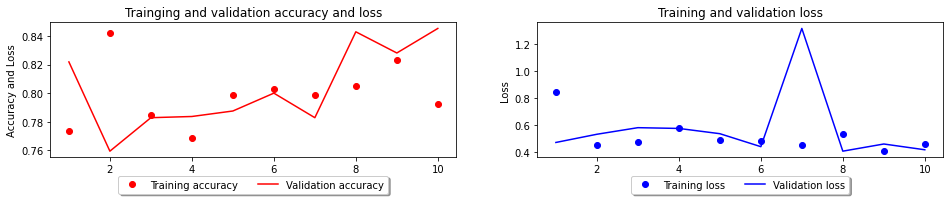

In [14]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()
show_graph(history.history)


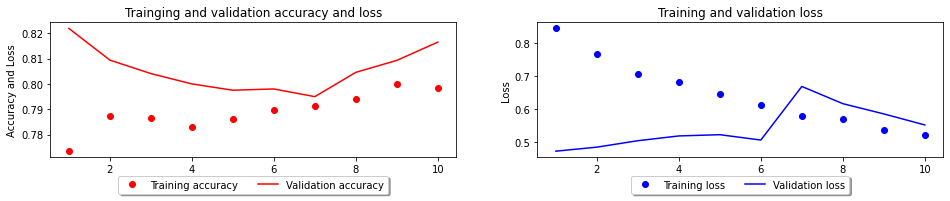

In [15]:
def smooth_curve(points, factor=.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)


#모델 중간평가

In [ ]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test_set'),
    target_size=(224, 224),
)

#model.evaluate_generator(testGen)
model.evaluate(testGen)

#모델 추가 학습

In [18]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(patience=0, min_delta=-0.02)

epochs = 10
steps = 20
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=steps, 
    validation_data=validationGen,
    validation_steps=steps,
#    callbacks=[early_stopping],
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 169s 9s/step - loss: 0.3769 - acc: 0.8500 - val_loss: 0.3835 - val_acc: 0.8609
Epoch 2/10
20/20 [==============================] - 171s 9s/step - loss: 0.4440 - acc: 0.8078 - val_loss: 0.4800 - val_acc: 0.7688
Epoch 3/10
20/20 [==============================] - 167s 9s/step - loss: 0.4363 - acc: 0.8062 - val_loss: 0.4250 - val_acc: 0.8125
Epoch 4/10
20/20 [==============================] - 168s 9s/step - loss: 0.4236 - acc: 0.8266 - val_loss: 0.4289 - val_acc: 0.8365
Epoch 5/10
20/20 [==============================] - 167s 9s/step - loss: 0.4214 - acc: 0.8125 - val_loss: 0.4179 - val_acc: 0.8344
Epoch 6/10
20/20 [==============================] - 169s 9s/step - loss: 0.4055 - acc: 0.8359 - val_loss: 0.4265 - val_acc: 0.8125
Epoch 7/10
20/20 [==============================] - 166s 9s/step - loss: 0.4240 - acc: 0.8422 - val_loss: 0.3877 - val_acc: 0.8365
Epoch 8/10
20/20 [==============================] - 164s 9s/step - loss: 0.3685 - a

In [20]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(patience=0, min_delta=-0.02)

epochs = 10
steps = 20
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=steps, 
    validation_data=validationGen,
    validation_steps=steps,
#    callbacks=[early_stopping],
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 157s 8s/step - loss: 0.3876 - acc: 0.8250 - val_loss: 0.5037 - val_acc: 0.8221
Epoch 2/10
20/20 [==============================] - 156s 8s/step - loss: 0.4307 - acc: 0.8172 - val_loss: 0.4124 - val_acc: 0.8391
Epoch 3/10
20/20 [==============================] - 155s 8s/step - loss: 0.4279 - acc: 0.8391 - val_loss: 0.4285 - val_acc: 0.7984
Epoch 4/10
20/20 [==============================] - 152s 8s/step - loss: 0.3679 - acc: 0.8562 - val_loss: 0.5053 - val_acc: 0.8301
Epoch 5/10
20/20 [==============================] - 151s 8s/step - loss: 0.4051 - acc: 0.8453 - val_loss: 0.3793 - val_acc: 0.8781
Epoch 6/10
20/20 [==============================] - 149s 8s/step - loss: 0.3728 - acc: 0.8562 - val_loss: 0.4461 - val_acc: 0.8172
Epoch 7/10
20/20 [==============================] - 148s 8s/step - loss: 0.3639 - acc: 0.8469 - val_loss: 0.4522 - val_acc: 0.8328
Epoch 8/10
20/20 [==============================] - 149s 8s/step - loss: 0.3579 - a

#추가 학습 결과 시각화

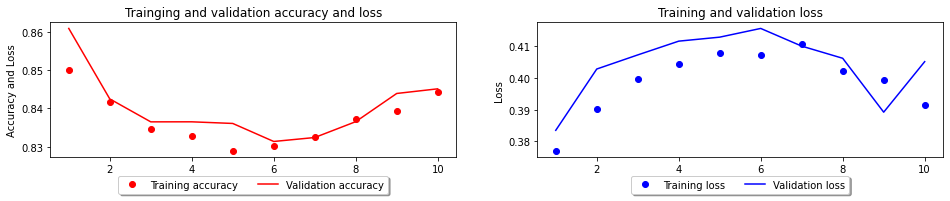

In [19]:
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)